# How To Put A Nation To Sleep
## Blake Whittington and Gabriele Spiridaviciute

# Set Up
## Imports

In [1]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick

## Parameters

In [2]:
# clean_2013_POLLDATASET = 'cleaned_data_csv/clean_2013_POLLDATASET.csv'
clean_2013_POLLDATASET = '../data_file/cleaned_data_csv/clean_2013_POLLDATASET.csv'

## Loading Raw Dataset

In [3]:
clean_2013Poll = pd.read_csv(clean_2013_POLLDATASET)
clean_2013Poll.shape

(1000, 140)

In [4]:
nap_df = clean_2013Poll.copy()

In [5]:
nap_df.shape

(1000, 140)

In [6]:
nap_df['naps_weekday'].value_counts()

None               674
1-2 Naps           208
3-5 Naps            79
6-10 Naps           26
10 or More Naps     13
Name: naps_weekday, dtype: int64

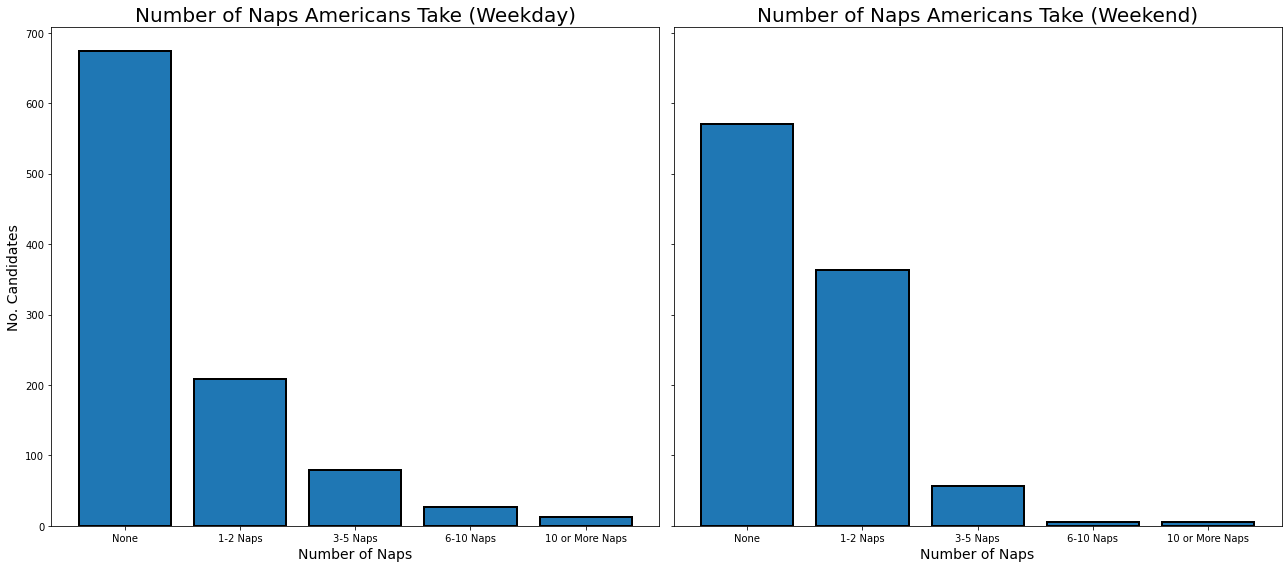

In [7]:
fig, (ax, bx) = plt.subplots(figsize=(18, 8), ncols=2, sharex=False,sharey='row')
colors = ('#ACDF87', '#1E8449', '#F7DC6F','#CD5C5C')

naps_weekday = nap_df['naps_weekday'].value_counts().index
naps_weekday_candidates = nap_df['naps_weekday'].value_counts()

naps_weekend = nap_df['naps_weekend'].value_counts().index
naps_weekend_candidates = nap_df['naps_weekend'].value_counts()

ax.bar (naps_weekday, naps_weekday_candidates,edgecolor='black', linewidth=2)
bx.bar (naps_weekend, naps_weekend_candidates,edgecolor='black', linewidth=2)

ax.set_title('Number of Naps Americans Take (Weekday)',fontsize = 20)
bx.set_title('Number of Naps Americans Take (Weekend)',fontsize = 20)

ax.set_xlabel('Number of Naps',fontsize = 14)
ax.set_ylabel('No. Candidates',fontsize = 14)

bx.set_xlabel('Number of Naps',fontsize = 14)

plt.tight_layout()

In [8]:
# nap_df['difficulty_falling_asleep_often'].value_counts()
nap_df = nap_df[nap_df['difficulty_falling_asleep_often'] != '99']
nap_df['difficulty_falling_asleep_often'].value_counts()

Rarely          397
A Few Nights    238
Never           218
Every Night     143
Name: difficulty_falling_asleep_often, dtype: int64

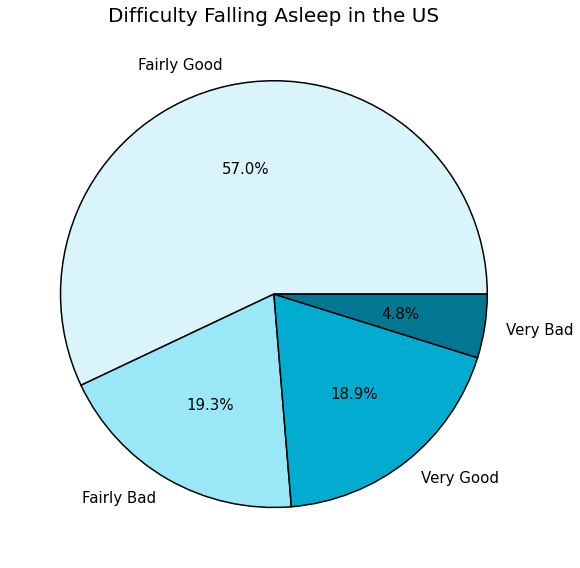

In [9]:
fig, ax = plt.subplots(figsize=(18, 8))
colors = ('#d9f4fa','#99e7f7','#02acd1','#017791')
sleep_difficulty = nap_df['sleep_rating'].value_counts().index
sleep_difficulty_count = nap_df['sleep_rating'].value_counts()

ax.pie(sleep_difficulty_count, 
       labels= sleep_difficulty,
       autopct='%.1f%%',
       textprops={'fontsize': 15},
       colors = colors,
       wedgeprops={"edgecolor":"black",'linewidth': 1.5,'linestyle': 'solid'})


ax.set_title('Difficulty Falling Asleep in the US',fontsize = 20)
plt.tight_layout()

In [10]:
df_groupby_difficulty_falling_asleep_often = nap_df.groupby(['difficulty_falling_asleep_often','naps_weekday', 'sleep_rating'])['difficulty_falling_asleep_often'].count().unstack('naps_weekday')
order = ['Every Night','A Few Nights','Rarely','Never']
order1 = ['Every Night','A Few Nights','Rarely','Never']
df_groupby_difficulty_falling_asleep_often = df_groupby_difficulty_falling_asleep_often.loc[order]
df_groupby_difficulty_falling_asleep_often.fillna(0)

naps_weekday                                  1-2 Naps  10 or More Naps  \
difficulty_falling_asleep_often sleep_rating                              
Every Night                     Fairly Bad        13.0              1.0   
                                Fairly Good        6.0              2.0   
                                Very Bad           8.0              1.0   
                                Very Good          1.0              0.0   
A Few Nights                    Fairly Bad        17.0              0.0   
                                Fairly Good       41.0              2.0   
                                Very Bad           2.0              0.0   
                                Very Good          3.0              0.0   
Rarely                          Fairly Bad        10.0              1.0   
                                Fairly Good       60.0              2.0   
                                Very Bad           1.0              0.0   
                                Very Good         12.0              2.0   
Never                           Fairly Bad         4.0              0.0   
                                Fairly Good       14.0              2.0   
                                Very Bad           0.0              0.0   
                                Very Good         14.0              0.0   

naps_weekday                                  3-5 Naps  6-10 Naps   None  
difficulty_falling_asleep_often sleep_rating                              
Every Night                     Fairly Bad        10.0        1.0   49.0  
                                Fairly Good        3.0        1.0   23.0  
                                Very Bad           1.0        2.0   20.0  
                                Very Good          0.0        0.0    1.0  
A Few Nights                    Fairly Bad         7.0        1.0   36.0  
                                Fairly Good       11.0        3.0  101.0  
                                Very Bad           0.0        0.0    3.0  
                                Very Good          0.0        0.0   11.0  
Rarely                          Fairly Bad         1.0        1.0   27.0  
                                Fairly Good       21.0        8.0  183.0  
                                Very Bad           0.0        1.0    2.0  
                                Very Good          6.0        4.0   55.0  
Never                           Fairly Bad         1.0        0.0   12.0  
                                Fairly Good       10.0        1.0   74.0  
                                Very Bad           1.0        0.0    6.0  
                                Very Good          7.0        3.0   69.0

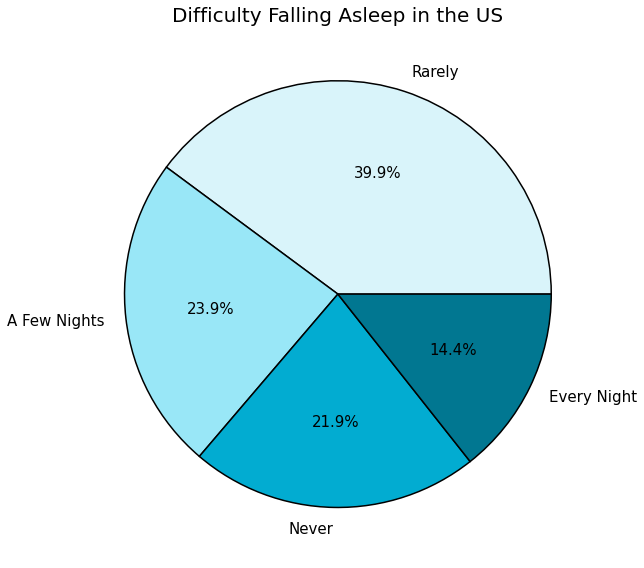

In [11]:
fig, ax = plt.subplots(figsize=(18, 8))
colors = ('#d9f4fa','#99e7f7','#02acd1','#017791')
sleep_difficulty = nap_df['difficulty_falling_asleep_often'].value_counts().index
sleep_difficulty_count = nap_df['difficulty_falling_asleep_often'].value_counts()

ax.pie(sleep_difficulty_count, 
       labels= sleep_difficulty,
       autopct='%.1f%%',
       textprops={'fontsize': 15},
       colors = colors,
       wedgeprops={"edgecolor":"black",'linewidth': 1.5,'linestyle': 'solid'})


ax.set_title('Difficulty Falling Asleep in the US',fontsize = 20)
plt.tight_layout()

In [12]:
df_groupby_difficulty_falling_asleep_oftens = nap_df.groupby(['difficulty_falling_asleep_often', 'naps_weekday'])['difficulty_falling_asleep_often'].count().unstack('naps_weekday')
order = ['Every Night','A Few Nights','Rarely','Never']
order1=['None','1-2 Naps','3-5 Naps', '6-10 Naps', '10 or More']
df_groupby_difficulty_falling_asleep_oftens = df_groupby_difficulty_falling_asleep_oftens.loc[order]
df_groupby_difficulty_falling_asleep_oftens


naps_weekday,1-2 Naps,10 or More Naps,3-5 Naps,6-10 Naps,None
difficulty_falling_asleep_often,,,,,
Every Night,28,4,14,4,93
A Few Nights,63,2,18,4,151
Rarely,83,5,28,14,267
Never,32,2,19,4,161


In [13]:
df_groupby_difficulty_falling_asleep_oftens = df_groupby_difficulty_falling_asleep_oftens[['None','1-2 Naps','3-5 Naps', '6-10 Naps', '10 or More Naps']]

df_groupby_difficulty_falling_asleep_oftens

naps_weekday,None,1-2 Naps,3-5 Naps,6-10 Naps,10 or More Naps
difficulty_falling_asleep_often,,,,,
Every Night,93,28,14,4,4
A Few Nights,151,63,18,4,2
Rarely,267,83,28,14,5
Never,161,32,19,4,2


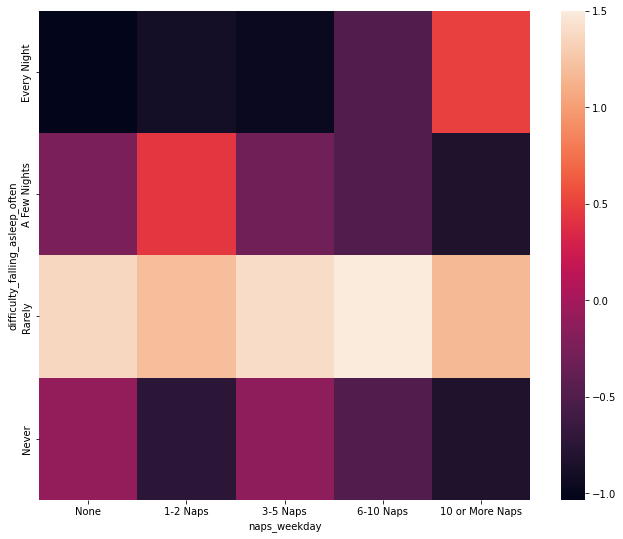

In [14]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(11, 9))
# sns.heatmap(df_groupby_difficulty_falling_asleep_oftens)

df_groupby_difficulty_falling_asleep_oftens_norm=(df_groupby_difficulty_falling_asleep_oftens-df_groupby_difficulty_falling_asleep_oftens.mean())/df_groupby_difficulty_falling_asleep_oftens.std()
sns.heatmap(df_groupby_difficulty_falling_asleep_oftens_norm)
plt.show()